VARIABLES

In [71]:
import pandas as pd
data=pd.read_csv("loan.csv")
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [72]:
data.shape


(10000, 14)

In [73]:
data.columns

Index(['customer_id', 'disbursed_amount', 'interest', 'market', 'employment',
       'time_employed', 'householder', 'income', 'date_issued', 'target',
       'loan_purpose', 'number_open_accounts', 'date_last_payment',
       'number_credit_lines_12'],
      dtype='object')

In [74]:
data.dtypes

customer_id                 int64
disbursed_amount          float64
interest                  float64
market                     object
employment                 object
time_employed              object
householder                object
income                    float64
date_issued                object
target                      int64
loan_purpose               object
number_open_accounts      float64
date_last_payment          object
number_credit_lines_12    float64
dtype: object

In [75]:
cat=[x for x in data.columns if data[x].dtype=="O"]
categ=data[cat]
categ

,market,employment,time_employed,householder,date_issued,loan_purpose,date_last_payment
0,C,Teacher,<=5 years,RENT,2013-06-11,Debt consolidation,2016-01-14
1,B,Accountant,<=5 years,OWNER,2014-05-08,Car purchase,2016-01-25
2,A,Statistician,<=5 years,RENT,2013-10-26,Debt consolidation,2014-09-26
3,A,Other,<=5 years,RENT,2015-08-20,Debt consolidation,2016-01-26
4,E,Bus driver,>5 years,RENT,2014-07-22,Debt consolidation,2016-01-11
...,...,...,...,...,...,...,...
9995,B,Civil Servant,<=5 years,MORTGAGE,2010-01-14,Other,2010-11-03
9996,B,Civil Servant,<=5 years,RENT,2015-03-20,Debt consolidation,2016-01-26
9997,B,Accountant,>5 years,OWNER,2015-04-03,Debt consolidation,2015-12-12
9998,C,Bus driver,>5 years,RENT,2014-11-23,Debt consolidation,2016-01-01


In [76]:
numeric=[x for x in data.columns if data[x].dtype!="O"]
numeric=data[numeric]
numeric

,customer_id,disbursed_amount,interest,income,target,number_open_accounts,number_credit_lines_12
0,0,23201.5,15.4840,84600.0,0,4.0,NaN
1,1,7425.0,11.2032,102000.0,0,13.0,NaN
2,2,11150.0,8.5100,69840.0,0,8.0,NaN
3,3,7600.0,5.8656,100386.0,0,20.0,NaN
4,4,31960.0,18.7392,95040.0,0,14.0,NaN
...,...,...,...,...,...,...,...
9995,9995,23750.0,11.0019,98000.0,0,12.0,NaN
9996,9996,11880.0,10.4923,36270.0,0,17.0,NaN
9997,9997,19950.0,8.4364,52250.0,0,9.0,NaN
9998,9998,4850.0,13.6409,80040.0,0,26.0,NaN


In [77]:
print(categ.shape,numeric.shape)

(10000, 7) (10000, 7)


In [78]:
data.groupby(data['employment']).mean()

/var/folders/qr/kwrllgv94x5c1gbsx4mq67440000gn/T/ipykernel_22700/1290501249.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data['employment']).mean()


,customer_id,disbursed_amount,interest,income,target,number_open_accounts,number_credit_lines_12
employment,,,,,,,
Accountant,5022.638498,13976.582453,12.457700,70845.602146,0.007042,12.281690,1.863636
Bus driver,4989.409611,14142.667048,12.787388,74369.779060,0.010297,12.887872,1.576923
Civil Servant,5013.309955,14864.206448,12.715298,75706.717766,0.011312,12.641403,2.000000
Dentist,4950.658768,14117.690166,12.760884,71651.711465,0.014218,12.697867,2.187500
Nurse,4990.711364,14217.374716,12.660905,73718.321294,0.010227,12.861364,1.809524
Other,4867.085747,14110.578795,12.908186,71288.831195,0.012746,12.415991,1.863636
Secretary,4928.264775,13871.817080,12.453911,70280.878103,0.009456,12.446809,2.000000
Software developer,5139.992574,14760.915532,12.836856,71997.281291,0.007426,12.706683,1.500000
Statistician,5160.481221,14203.556045,12.601172,73048.433783,0.016432,12.720657,1.619048


NUMERIC

Text(0.5, 0, 'amount')

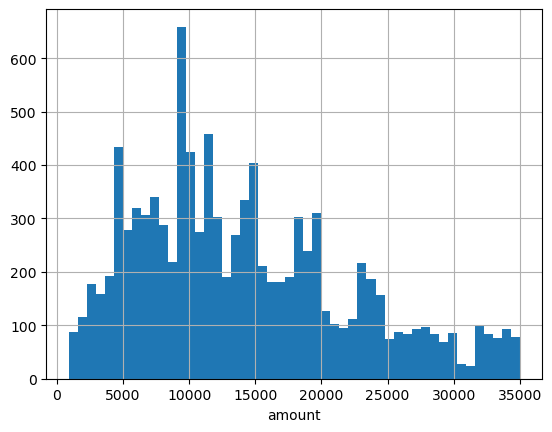

In [79]:
import matplotlib.pyplot as plt
fig=data["disbursed_amount"].hist(bins=50)
fig.set_xlabel("amount")

CATEGORICAL

<Axes: >

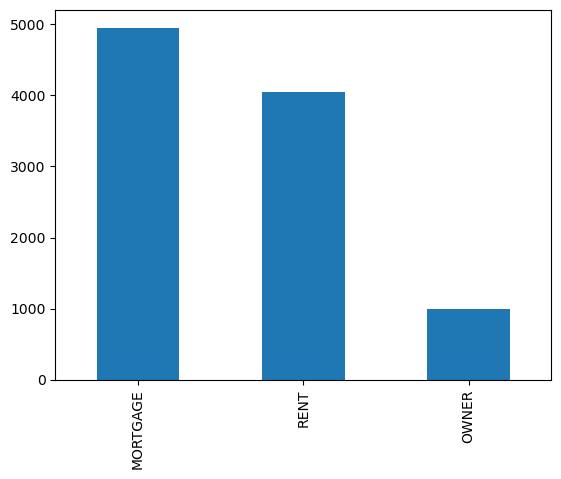

In [80]:
data['householder'].value_counts().plot.bar()

<Axes: >

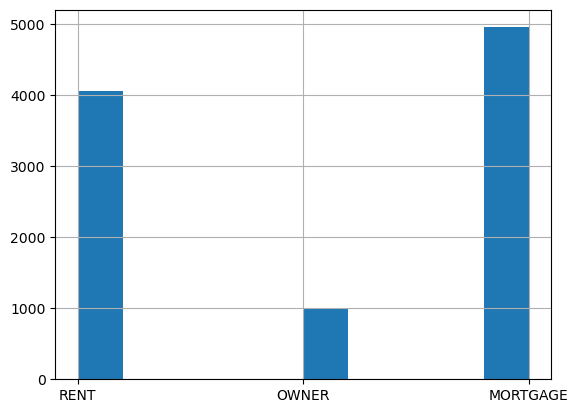

In [81]:
data['householder'].hist()

TIME

In [82]:
data['date_issued'].dtype

dtype('O')

In [83]:
data['date_issued']=pd.to_datetime(data['date_issued'])

In [84]:
data['date_issued'].dtype

dtype('<M8[ns]')

In [86]:
data['month']=data['date_issued'].dt.month
data

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,month
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,6
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,5
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,10
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,8
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,23750.0,11.0019,B,Civil Servant,<=5 years,MORTGAGE,98000.0,2010-01-14,0,Other,12.0,2010-11-03,NaN,1
9996,9996,11880.0,10.4923,B,Civil Servant,<=5 years,RENT,36270.0,2015-03-20,0,Debt consolidation,17.0,2016-01-26,NaN,3
9997,9997,19950.0,8.4364,B,Accountant,>5 years,OWNER,52250.0,2015-04-03,0,Debt consolidation,9.0,2015-12-12,NaN,4
9998,9998,4850.0,13.6409,C,Bus driver,>5 years,RENT,80040.0,2014-11-23,0,Debt consolidation,26.0,2016-01-01,NaN,11


In [89]:
data['year']=data['date_issued'].dt.year
data

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,month,year
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013,2013
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,2014,2014
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,2013,2013
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,2015,2015
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,23750.0,11.0019,B,Civil Servant,<=5 years,MORTGAGE,98000.0,2010-01-14,0,Other,12.0,2010-11-03,NaN,2010,2010
9996,9996,11880.0,10.4923,B,Civil Servant,<=5 years,RENT,36270.0,2015-03-20,0,Debt consolidation,17.0,2016-01-26,NaN,2015,2015
9997,9997,19950.0,8.4364,B,Accountant,>5 years,OWNER,52250.0,2015-04-03,0,Debt consolidation,9.0,2015-12-12,NaN,2015,2015
9998,9998,4850.0,13.6409,C,Bus driver,>5 years,RENT,80040.0,2014-11-23,0,Debt consolidation,26.0,2016-01-01,NaN,2014,2014


<Axes: xlabel='year,month'>

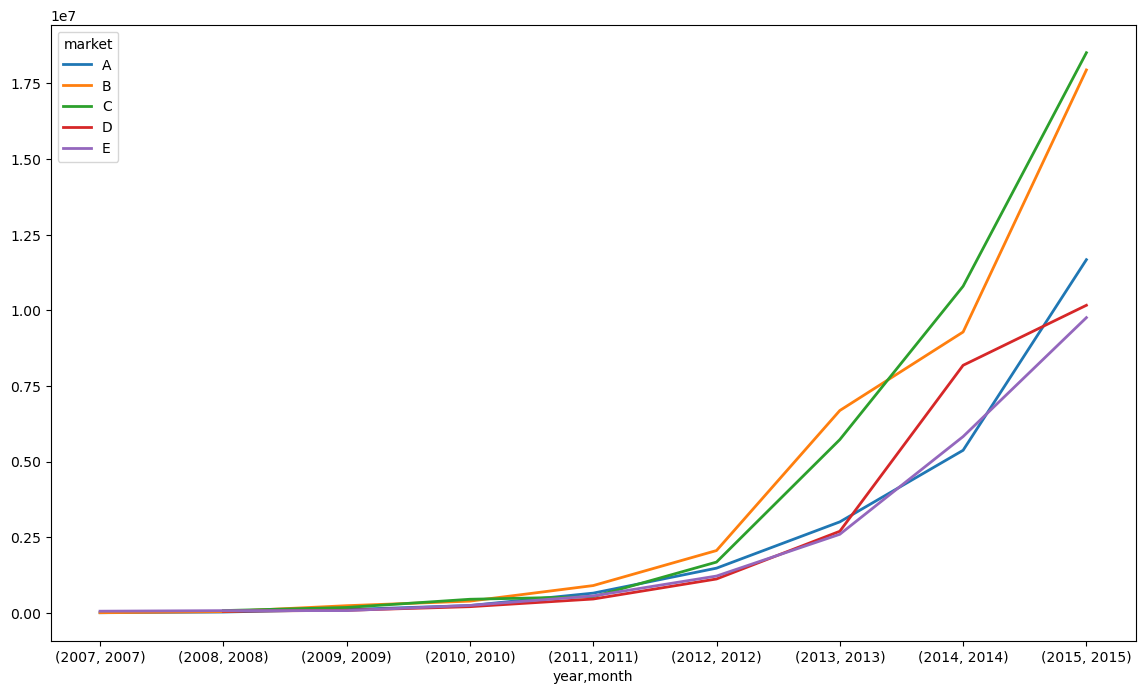

In [103]:

data.groupby(['year','month','market'])['disbursed_amount'].sum().unstack().plot(figsize=(14, 8), linewidth=2)


MIXED

In [104]:
data2=pd.read_csv("sample_s2.csv")

In [105]:
data2.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [108]:
data2['open_il_24m'].unique()

array(['C', 'A', 'B', '0.0', '1.0', '2.0', '4.0', '3.0', '6.0', '5.0',
       '9.0', '7.0', '8.0', '13.0', '10.0', '19.0', '11.0', '12.0',
       '14.0', '15.0'], dtype=object)

<Axes: >

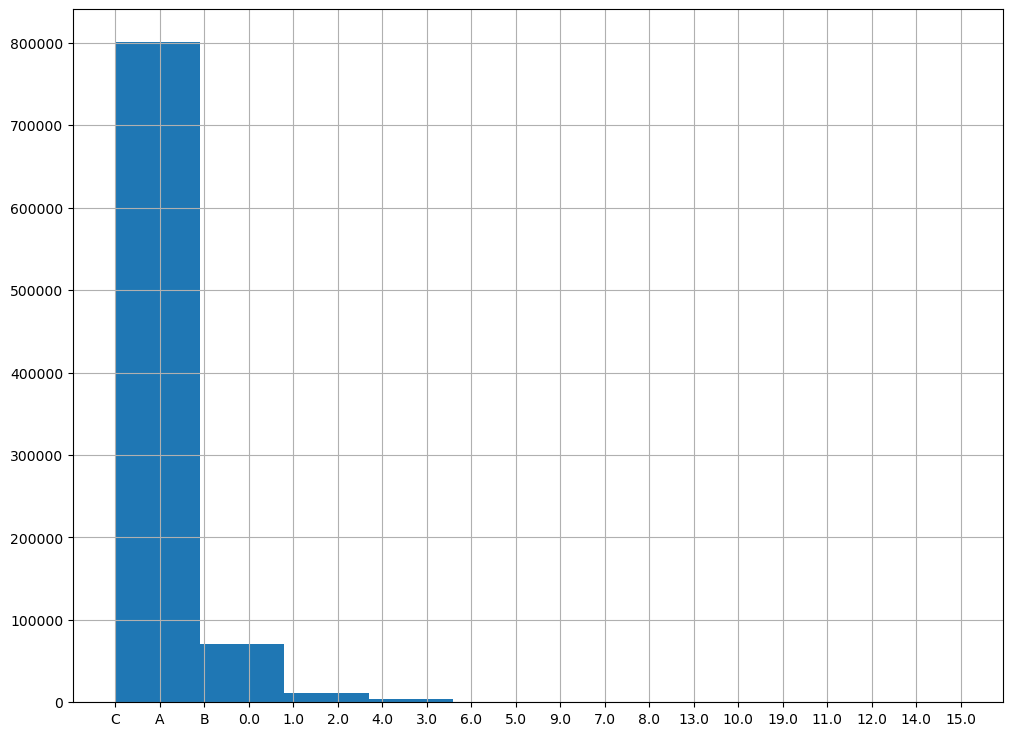

In [111]:
data2['open_il_24m'].hist(figsize=(12,9))

<Axes: >

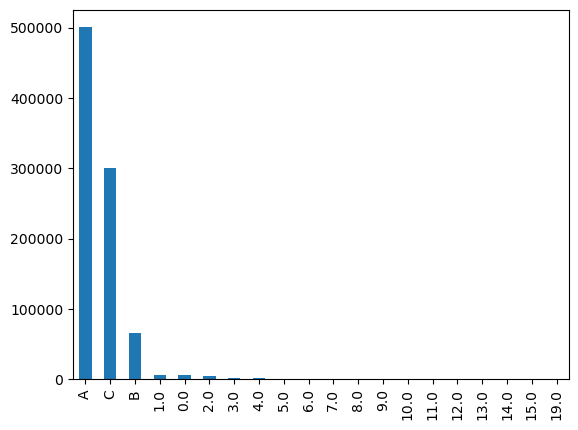

In [116]:
data2['open_il_24m'].value_counts().plot.bar()